# Physics 760: Computational Physics
## WS 2022/23
### Week 5
#### Pugazharasu Anancia Devaneyan, Rishi Kumar Senthil Kumar

In [3]:
#setup the notebook
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math as mth
import scipy as sp
from scipy import special

Populating the interactive namespace from numpy and matplotlib


# Leapfrog Algorithm

In [15]:
def hammy(p,phi):
    #Creating the hamiltonian
    ham = ((p**2)/2) + ((phi**2)) + np.log(2 + (phi**2))
    return ham

In [34]:
def leap(p0,phi0,N_md):
    #Setting up the initial values
    p = 0
    phi = 0
    epsilon = 0.1/N_md
    
    #Performing the first half step
    p = p0
    phi = phi0 + ((epsilon/2)*p0)
    
    #Iterating through the Ṇ
    for i in range(1,N_md):
        p = p - (epsilon*((phi**2)+(np.log(2+(phi**2)))))
        phi += epsilon*p
        
    #Performing the final leap
    p = p - (epsilon*((phi**2)+(np.log(2+(phi**2)))))
    phi += (epsilon/2)*p
    return p,phi

Now we plot for the convergence versus the 

In [6]:
p_leap = 1
phi_leap = 1
N_leap = 3

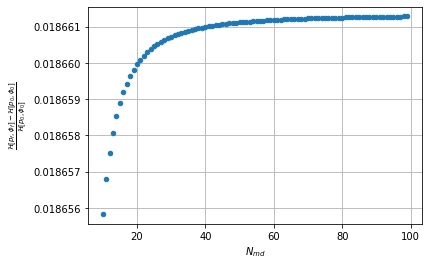

In [35]:
initial_hammy = hammy(p_leap,phi_leap)
N_mds = np.arange(10,100)
y_axis = []

for n in N_mds:
    integ = leap(p_leap,phi_leap,n)
    final_hammy = hammy(integ[0],integ[1]) 
    y = (final_hammy-initial_hammy)/initial_hammy
    y_axis.append(y)

plt.plot(N_mds,y_axis,marker='.',markersize=9,linestyle='')
#plt.yscale('log')
plt.xlabel('$N_{md}$')
plt.ylabel('$\\frac{\\mathcal{H}\\left[p_f, \\phi_f\\right]-\\mathcal{H}\\left[p_0, \\phi_0\\right]}{\\mathcal{H}\\left[p_0, \\phi_0\\right]}$')
plt.grid()
plt.savefig('Plots/h_v_n.png',dpi=300, bbox_inches = "tight")

# Hybrid Monte Carlo algorithm

In [8]:
def observable(phi):
    output = np.cos(np.sqrt(1 + (phi**2)))
    return output

In [9]:
def accept_reject(sweeps,p,phi,N_md):
    phi_list = []
    phi_list.append(observable(phi))
    
    new_vars = []
    new_hammy = 0
    
    for i in range(sweeps):
        
        p = random.gauss(0,1)
        
        init_ham = hammy(p,phi)
        
        new_vars = leap(p,phi,N_md)
        
        new_hammy = hammy(new_vars[0],new_vars[1])
        
        rand = np.random.random()
        
        # fill in the metropolis critereon
        if rand<=min(1,np.exp(init_ham - new_hammy)):
            
            #p = random.gauss(0,1)
            #p = new_vars[0]
            phi = new_vars[1]
            phi_list.append(observable(new_vars[1]))
            
        else:
            
            phi_list.append(phi_list[-1])
        
    return phi_list

In [26]:
piece_length = 3 #1/30
no_traj = 1000000
counter = 0
markov_chain = accept_reject(no_traj,1,1,piece_length)

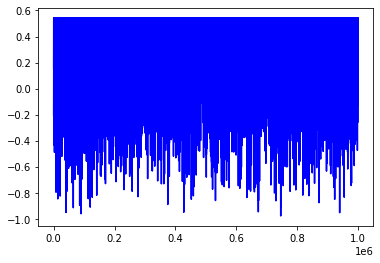

In [27]:
scale = np.linspace(0,len(markov_chain),len(markov_chain), dtype=int)
plt.plot(scale,markov_chain,'b-')
plt.savefig('Plots/thermal.png',dpi=300, bbox_inches = "tight")

In [28]:
ntherm = 500
markov_mod = np.delete(np.array(markov_chain),[i for i in range(ntherm)])

In [8]:
def correlation(t,phi_list):
    mean = np.mean(phi_list)
    N = len(phi_list)
    summand = 0
    for i in range(N-t):
        summand += (phi_list[i]-mean)*(phi_list[i+t]-mean)
    summand = summand/(N-t)
    return summand

In [9]:
def autocorrelation(t,phi_list):
    return  correlation(t,phi_list)/correlation(0,phi_list)

In [10]:
def normalized_time(phi_list,W):
    summand = 0
    for t in range(W):
        summand += autocorrelation(t,phi_list)
    summand += 0.5 * autocorrelation(0,phi_list)
    return summand

In [ ]:
1551

In [188]:
display(correlation(100,markov_mod))

0.019947124920502057

In [190]:
normalized_time(markov_mod,1551)

80.05794537110154

In [192]:
norm_tim = 80.05794537110154

In [199]:
corr_list = []
time = np.linspace(0,1000,1000,dtype=int)
for i in time:
    corr_list.append(autocorrelation(i,markov_mod))

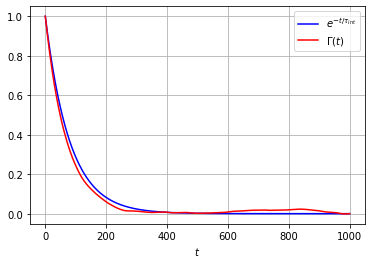

In [202]:
plt.plot(time,np.exp(-time/norm_tim),'b-',label='$e^{-t/\\tau_{int}}$')
plt.plot(time,corr_list,'r-',label = '$\\Gamma(t)$')
plt.xlabel('$t$')
plt.legend()
plt.grid()
plt.savefig('Plots/corr_v_e.png',dpi=300, bbox_inches = "tight")

# Bootstrap

In [20]:
def binner(phi_list, bind_width):
    bin_list = []
    for i in range(0,len(phi_list),bind_width):
        bin_list.append(np.mean(phi_list[i:i+bind_width]))
    return bin_list

In [19]:
bin_list = [1000,10000,100000]
corr_list_2 = []
corr_list_3 = []
corr_list_4 = []
markov_binned = binner(markov_mod,50)
for i in time:
    corr_list_2.append(autocorrelation(i,binner(markov_mod,100)))
for i in time:
    corr_list_3.append(autocorrelation(i,binner(markov_mod,50)))
for i in time:
    corr_list_4.append(autocorrelation(i,binner(markov_mod,25)))

NameError: name 'binner' is not defined

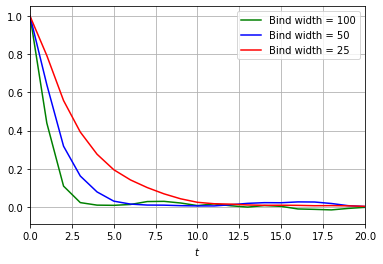

In [223]:
plt.plot(time,corr_list_2,'g-',label = 'Bind width = 100')
plt.plot(time,corr_list_3,'-b',label = 'Bind width = 50')
plt.plot(time,corr_list_4,'-r',label = 'Bind width = 25')
plt.xlabel('$t$')
plt.xlim(0,20)
plt.legend()
plt.grid()
plt.savefig('Plots/bin_v_t.png',dpi=300, bbox_inches = "tight")

In [1]:
def bootstrap(phi_list,bin_width):
    boots = []
    for i in range(bin_width):
        j = random.randint(0,len(phi_list))
        boots.append(phi_list[j])
    return boots

In [29]:
error_list = []
binin = [100,75,50,25,15,10]
for bin in binin:
    mean_list = []
    for i in range(200):
        test = bootstrap(markov_mod,bin)
        mean_list.append(np.mean(test))
    for j in range(len(mean_list)):
        error = np.sqrt((1/(bin-1))*((mean_list[j] - np.mean(mean_list))**2))
    error_list.append(error)

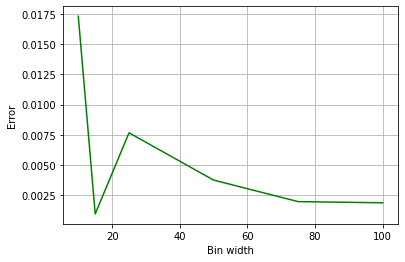

In [38]:
plt.plot(binin,error_list,'g-',label = 'Bind width = 100')
plt.xlabel('Bin width')
plt.ylabel('Error')
plt.grid()
plt.savefig('Plots/error_v_bin.png',dpi=300, bbox_inches = "tight")

In [50]:
error_list_2 = []
bin_size = 75
ensemble = 500
for e in range(200,ensemble):
    mean_list = []
    for i in range(e):
        test = bootstrap(markov_mod,bin)
        mean_list.append(np.mean(test))
    for j in range(len(mean_list)):
        error = np.sqrt((1/(bin-1))*((mean_list[j] - np.mean(mean_list))**2))
    error_list_2.append(error)

IndexError: index 999501 is out of bounds for axis 0 with size 999501

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

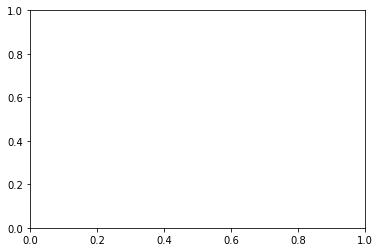

In [46]:
ensembles = np.linspace(200,ensemble,(ensemble-200),dtype=int)
plt.plot(binin,error_list_2,'g-',label = 'Bind width = 100')
plt.xlabel('Bin width')
plt.ylabel('Error')
plt.grid()
plt.savefig('Plots/error_v_bin.png',dpi=300, bbox_inches = "tight")